In [ ]:
#Description:
#   Analysis of NATIONAL AND STATE FBI HOMICIDE CRIME DATA 
#
#Definitions:
#   
#  
#
#Modification History:
#   DD-MMM-YYY  Author          Description
#   17-07-2019  Stacey Smith    Adding Census/Economic data and Agency Analysis

In [49]:
# Dependencies and Setup

%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv
import scipy.stats as stats
from scipy.stats import ttest_ind
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

from pprint import pprint

IMPORT DATA FROM CSV FILES

In [50]:
#IMPORT CENSUS DATA
ses_census_path = "output_data/census_data.csv"
ses_census_df = pd.read_csv(ses_census_path, encoding="ISO-8859-1")

#IMPORT AGENCY DATA
agency_path = "output_data/final_agency_data.csv"
agency_df = pd.read_csv(agency_path, encoding="ISO-8859-1")
agency_df = agency_df.rename(columns={'State':'state_abbr'})
#agency_df_sorted = agency_df.sort_values(by=['Pct Active'], ascending=False)

#IMPORT MURDER RATE & DEATH PENALTY BY STATE (DEATH PENALTY.ORG) 
ses_mr_path = "output_data/Murder_Rates_and_Death_Penalty_by_State_2017.csv"
ses_mr_df = pd.read_csv(ses_mr_path, encoding="ISO-8859-1")
ses_mrcensus = pd.merge(ses_census_df, ses_mr_df, on='state_name')

#IMPORT VICTIM DATA BY STATE
state_v_sex_path = "output_data/state_v_sex_data.csv"
state_v_sex_df = pd.read_csv(state_v_sex_path, encoding="ISO-8859-1")
ses_state_v_sex_2017 = state_v_sex_df.loc[state_v_sex_df['Year']==2017, :]


AGENCY ANALYSIS

<IPython.core.display.Javascript object>


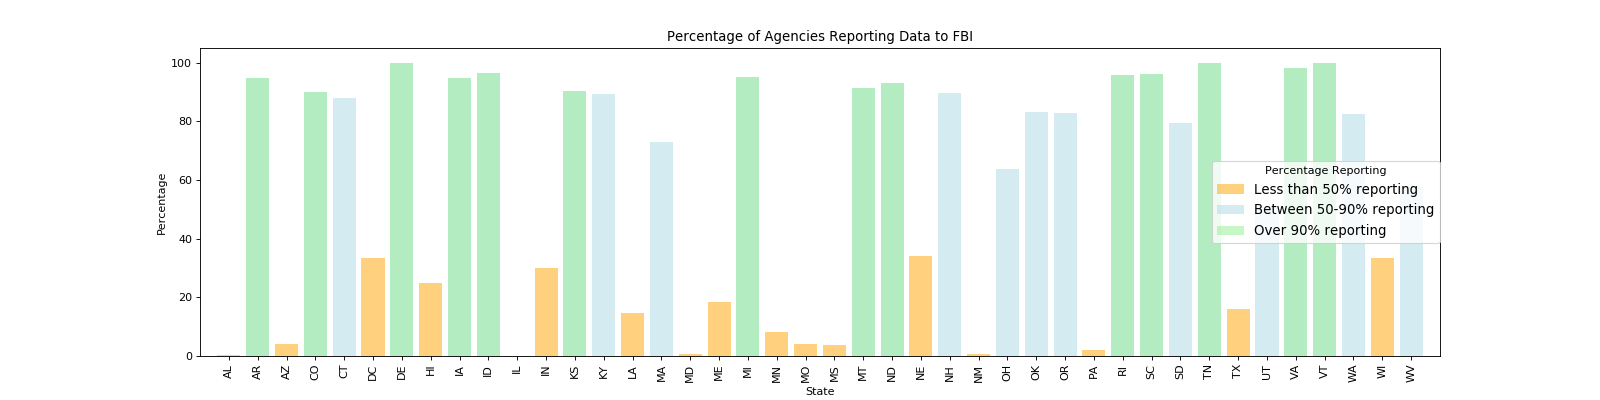

In [51]:
#PERCENTAGE OF AGENCIES REPORTING DATA TO THE FBI PER STATE
a_states = agency_df['state_abbr']
agency_pct = agency_df['Pct Active']
x_axis = np.arange(len(a_states))

plt.figure(figsize=(20, 5))

mask2 = agency_pct < 50
mask3 = agency_pct > 50
mask4 = agency_pct > 90


plt.bar(x_axis[mask2], agency_pct[mask2], color='orange', alpha=0.5, align='center', label="Less than 50% reporting")
plt.bar(x_axis[mask3], agency_pct[mask3], color='lightblue', alpha=0.5, align='center' ,label='Between 50-90% reporting')
plt.bar(x_axis[mask4], agency_pct[mask4], color='lightgreen', alpha=0.5, align='center' ,label='Over 90% reporting')


plt.legend(loc='right', borderaxespad=0, fontsize = 12, title= "Percentage Reporting") 

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, a_states, rotation="vertical")

plt.xlim(-1, len(x_axis))

plt.title("Percentage of Agencies Reporting Data to FBI")
plt.xlabel("State")
plt.ylabel("Percentage")

plt.savefig("Images/Agencies_Reporting_to_FBI.png")

ECONOMIC/CENSUS ANALYSIS

In [ ]:
#PER CAPITA INCOME BY STATE FOR 2017 - - BASED ON 2017 CENSUS DATA ONLY 
c_states = ses_mrcensus['state_abbr']
per_capita = ses_mrcensus['Per_capita_income']
x_axis = np.arange(len(c_states))

plt.figure(figsize=(20, 5))
plt.bar(x_axis, per_capita, color='gray', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, c_states, rotation="vertical")

plt.xlim(-1, len(x_axis))

plt.title("Per Capita Income and Benefits by State (2017)")
plt.xlabel("State")
plt.ylabel("Income (Inflation Adjusted Dollars)")

plt.savefig("Images/State_PerCapita_Income_2017.png")

<IPython.core.display.Javascript object>


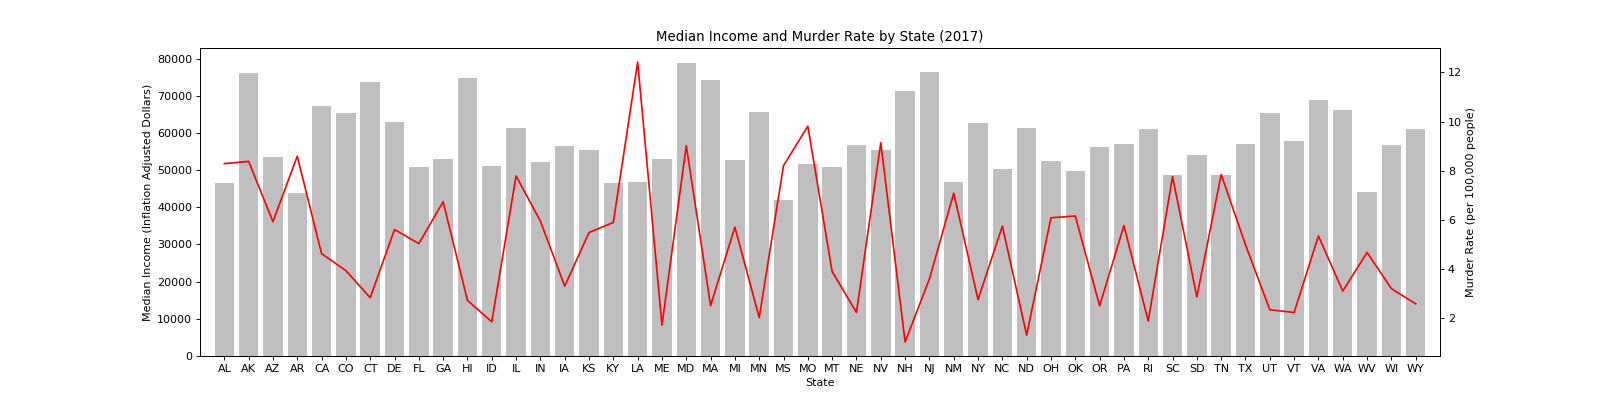

In [52]:
#MEDIAN EARNINGS BY STATE FOR 2017 with MURDER RATE BY STATE - - BASED ON 2017 CENSUS DATA ONLY 
c_states = ses_mrcensus['state_abbr']
median_income = ses_mrcensus['Total_median_income']
mrate = ses_mrcensus['Murder Rate']

x_axis = np.arange(len(c_states))

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

ax.bar(x_axis, median_income, color='gray', alpha=0.5, align='center')
ax2 = ses_mrcensus['Murder Rate'].plot(secondary_y=True, color='r')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, c_states, rotation="vertical")

plt.xlim(-1, len(x_axis))


plt.title("Median Income and Murder Rate by State (2017)")
ax.set_xlabel("State")
ax.set_ylabel("Median Income (Inflation Adjusted Dollars)")
ax2.set_ylabel("Murder Rate (per 100,000 people)")

plt.savefig("Images/Median_Income_and_Murder_Rate_2017.png")

In [ ]:
#T-Test:  Median Income and Avg Murder Rate(2017) by State
#Question:  Is there a correlation between median income and the murder rate?
#Null Hypothesis:  no statistically significant difference between mean income and murder rate

median_income = ses_mrcensus['Total_median_income']
mrate = ses_mrcensus['Murder Rate']

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p
 
# identify two independent samples
data1 = median_income
data2 = mrate

# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))

# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


<IPython.core.display.Javascript object>


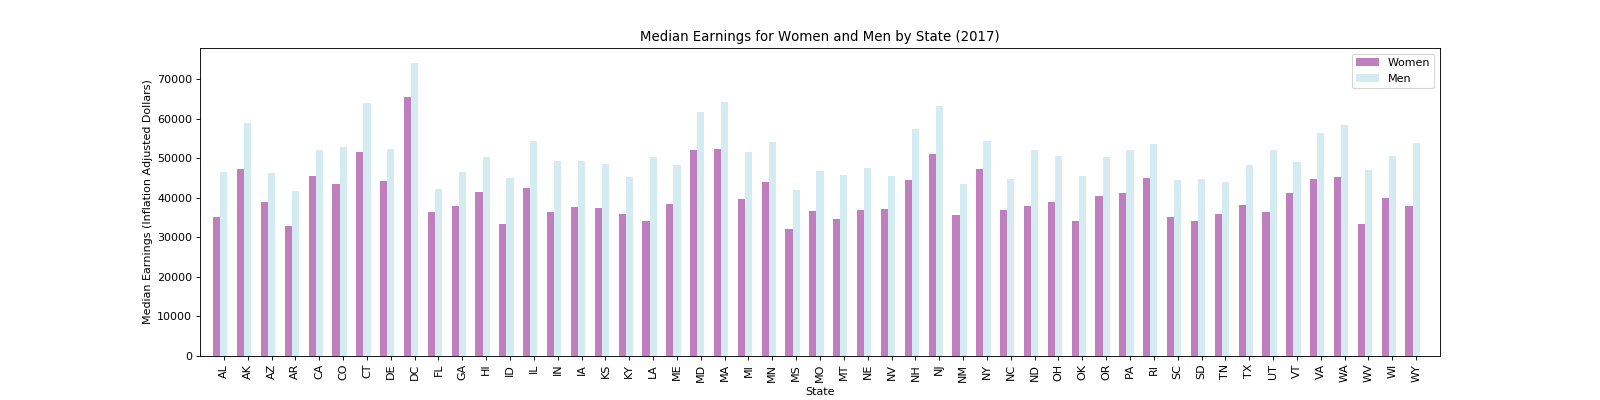

In [53]:
#MEDIAN EARNINGS (MALE & FEMALE SIDE-BY-SIDE) BY STATE FOR 2017 - - BASED ON 2017 CENSUS DATA ONLY 

c_states = ses_census_df['state_abbr']
med_earn_F = ses_census_df['Median_female']
med_earn_M = ses_census_df['Median_male']

x_axis = np.arange(len(c_states))

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

w = 0.3

women = ax.bar(x_axis-w, med_earn_F, color='purple', alpha=0.5, align='center', width = w)
men = ax.bar(x_axis, med_earn_M, color='lightblue', alpha=0.5, align='center', width = w)
#ax2 = ses_mrcensus['Murder Rate'].plot(secondary_y=True, color='y')


#ax2 = ses_state_v_sex_2017['Male Count'].plot(secondary_y=True, color='y')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, c_states, rotation="vertical")

plt.xlim(-1, len(x_axis))

plt.title("Median Earnings for Women and Men by State (2017)")
ax.set_xlabel("State")
ax.set_ylabel("Median Earnings (Inflation Adjusted Dollars)")
#ax2.set_ylabel("Murder Rate (per 100,000 people)")

#ax2.set_ylabel("Number of Male Homicide Victims by State")

plt.legend((women[0], men[0]), ('Women', 'Men'))

plt.savefig("Images/Male_and_Female_State_Median_Earnings_2017.png")


In [ ]:
#PERCENTAGE OF 18+ POPULATION LIVING BELOW POVERTY LEVEL - BASED ON 2017 CENSUS DATA ONLY 
c_states = ses_census_df['state_abbr']
pop_pov = ses_census_df['Pct_Pov_pop_all18']
x_axis = np.arange(len(c_states))

plt.figure(figsize=(20, 5))
plt.bar(x_axis, pop_pov, color='gray', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, c_states, rotation="vertical")

plt.xlim(-1, len(x_axis))

plt.title("Percentage of 18+ Population Living Under Poverty Level")
plt.xlabel("State")
plt.ylabel("Percent")

plt.savefig("Images/Pct_Poverty_2017.png")

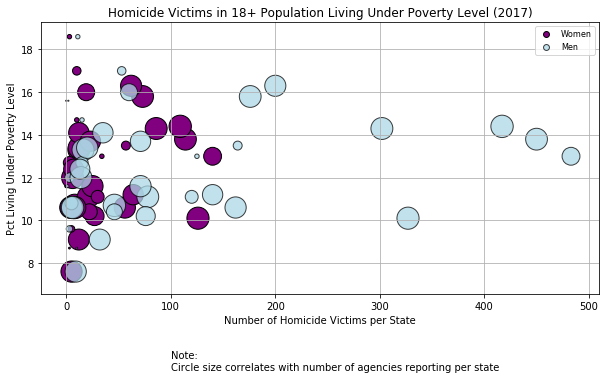

In [48]:
#NUMBER OF HOMICIDES IN POPULATION LIVING UNDER POVERTY LEVEL

#Put together the dataframe that includes census/poverty data, numbers of homicides by state, and agencies reporting
ses_state_v_sex_2017 = ses_state_v_sex_2017.rename(columns={'State': 'state_abbr'})

vcensus = pd.merge(ses_state_v_sex_2017, ses_census_df, on='state_abbr')
vcensus = pd.merge(agency_df, vcensus, on='state_abbr')

m_count = vcensus['Male Count']
f_count = vcensus['Female Count']
pct_pov = vcensus['Pct_Pov_pop_all18']
state_weight = vcensus['Pct Active']

plt.figure(figsize=(10, 5))

#Build the scatter plots for each city types
plt.scatter(f_count, pct_pov, marker="o", facecolors="purple", edgecolors="black", alpha=1,  s=state_weight*5, label='Women') 
plt.scatter(m_count, pct_pov, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75, s=state_weight*5, label='Men') 

#Incorporate the other graph properties
plt.grid()

plt.xlabel("Number of Homicide Victims per State")
plt.ylabel("Pct Living Under Poverty Level")
plt.title("Homicide Victims in 18+ Population Living Under Poverty Level (2017)")

#Create a legend
legend = plt.legend(fontsize = 8, loc="best") 
legend.legendHandles[0]._sizes = [35]
legend.legendHandles[1]._sizes = [35]


#Incorporate a text label regarding circle size
plt.text(100,3,"Note: \nCircle size correlates with number of agencies reporting per state", fontsize = 10)

#Save Figure
plt.savefig("Images/Scatter_Poverty_Homicide_2017.png", bbox_inches = 'tight')

plt.show()